In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [2]:
df = pandas.read_csv("../datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


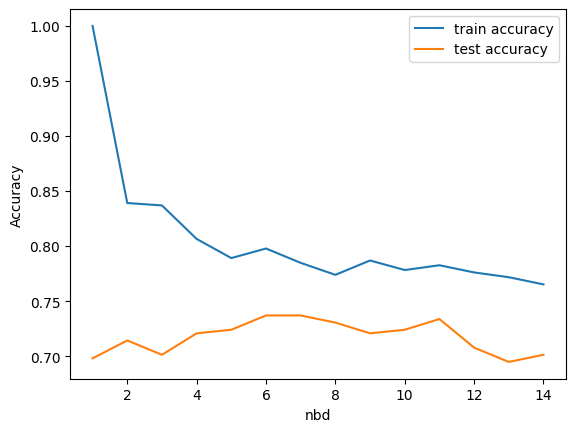

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(df.loc[:,df.columns!='Outcome'], df['Outcome'], random_state=80, train_size=.6)
#df.loc[:,df.columns!='Outcome'] select all other except the outcome as features i.e.X,and y=outcome

from sklearn.neighbors import KNeighborsClassifier

#setting up model training and evealuation

train_accuracy=[]
test_accuracy=[]

nbd=range(1,15) #setting up the range for the neighbours

for n_nbd in nbd:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_nbd)
    knn.fit(x_train, y_train)
    
    #record the accuracy 
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.plot(nbd, train_accuracy, label="train accuracy")
plt.plot(nbd, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("nbd")

plt.legend()

In [14]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print("train_accuracy score")
print(knn.score(x_train, y_train))

print("test_accuracy score")
print(knn.score(x_test, y_test))

train_accuracy score
0.7978260869565217
test_accuracy score
0.737012987012987


In [15]:
def predict_diabetes(input_data, model, feature_columns):
    # Ensure input_data is a DataFrame with the same structure as X
    input_df = pandas.DataFrame([input_data], columns=feature_columns)
    
    # Predict the outcome
    prediction = model.predict(input_df)
    
    if prediction[0] == 1:
        return "The model predicts that the user has diabetes."
    else:
        return "The model predicts that the user does not have diabetes."

# Example usage:
user_input = {
    'Pregnancies': 2,
    'Glucose': 150,
    'BloodPressure': 130,
    'SkinThickness': 20,
    'Insulin': 100,
    'BMI': 32.0,
    'DiabetesPedigreeFunction': 0.47,
    'Age': 33
}

# Call the function with the trained model and feature columns
print(predict_diabetes(user_input, knn, x_train.columns))

The model predicts that the user has diabetes.


In [16]:
import joblib
joblib.dump(knn , 'Diabetes_model.joblib')

['Diabetes_model.joblib']